<a href="https://colab.research.google.com/github/sdevam6990/olympic-data-insights/blob/main/Copy_of_olympic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
df = pd.read_csv("dataset_olympics.csv")

In [ ]:
df.drop("ID" , axis = 1 , inplace  = True)

In [ ]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
df['NOC'].unique()

array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
       'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
       'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
       'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
       'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
       'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
       'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
       'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
       'LBR', 'SUR',

In [ ]:
df[]

In [ ]:
df.isnull().sum()

Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

In [ ]:
df_medals = df.dropna(subset = ["Medal"])

In [ ]:
top_10 = df_medals["NOC"].value_counts().head(10)

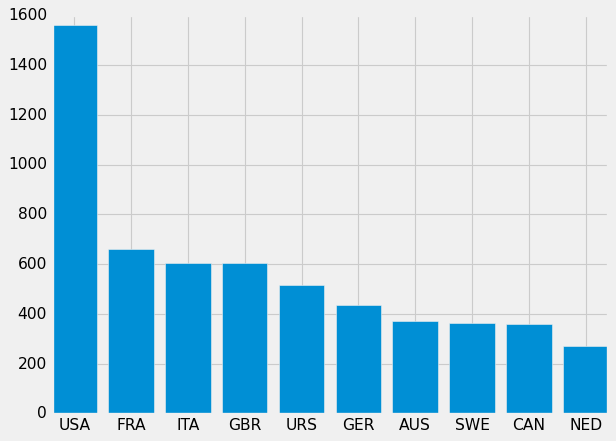

In [ ]:
plt.bar(top_10.index , top_10.values)
plt.show()

In [ ]:
df.sort_values( "Year" , inplace = True)

In [ ]:
df_w  = df[df['Season'] == "Winter"]
df_s  = df[df['Season'] == "Summer"]

In [ ]:
par_w = df_w["Year"].value_counts()
par_w = par_w.sort_index()

In [ ]:
par_s = df_s["Year"].value_counts()
par_s = par_s.sort_index()

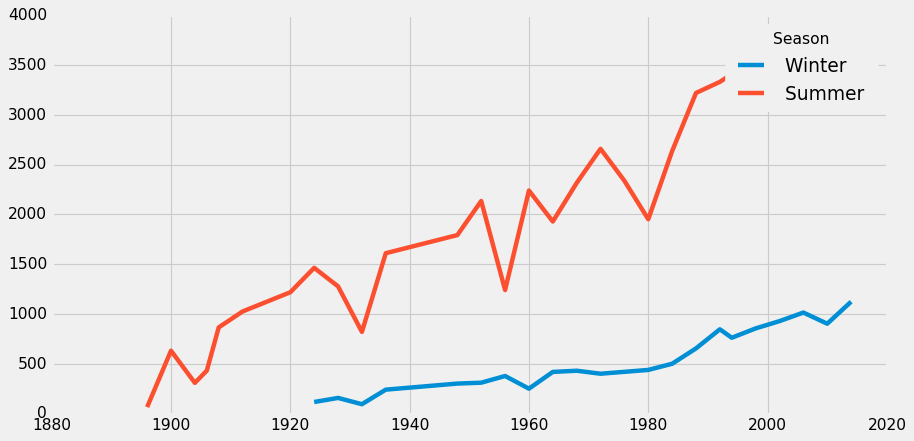

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(par_w.index , par_w.values , label = "Winter ")
plt.plot(par_s.index , par_s.values , label = "Summer ")
plt.legend(title = "Season")
plt.show()

## **participants in each sport (gender)**

In [ ]:
df.sort_values( "Sport" , inplace = True)

In [ ]:
df_m = df[df['Sex'] == "M"]

In [ ]:
df_f = df[df['Sex'] == "F"]

In [ ]:
mpartspr = df_m.value_counts("Sport")
mpartspr = mpartspr.sort_index()

In [ ]:
fpartspr = df_f.value_counts("Sport")
fpartspr = fpartspr.sort_index()

In [ ]:
inters = np.intersect1d(mpartspr.index , fpartspr.index)
for x in mpartspr.index:
  if x in inters:
    pass
  else:
    mpartspr.drop(x , inplace= True)

In [ ]:
for x in fpartspr.index:
  if x in inters:
    pass
  else:
    fpartspr.drop(x , inplace= True)

In [ ]:
mpartspr.shape

(49,)

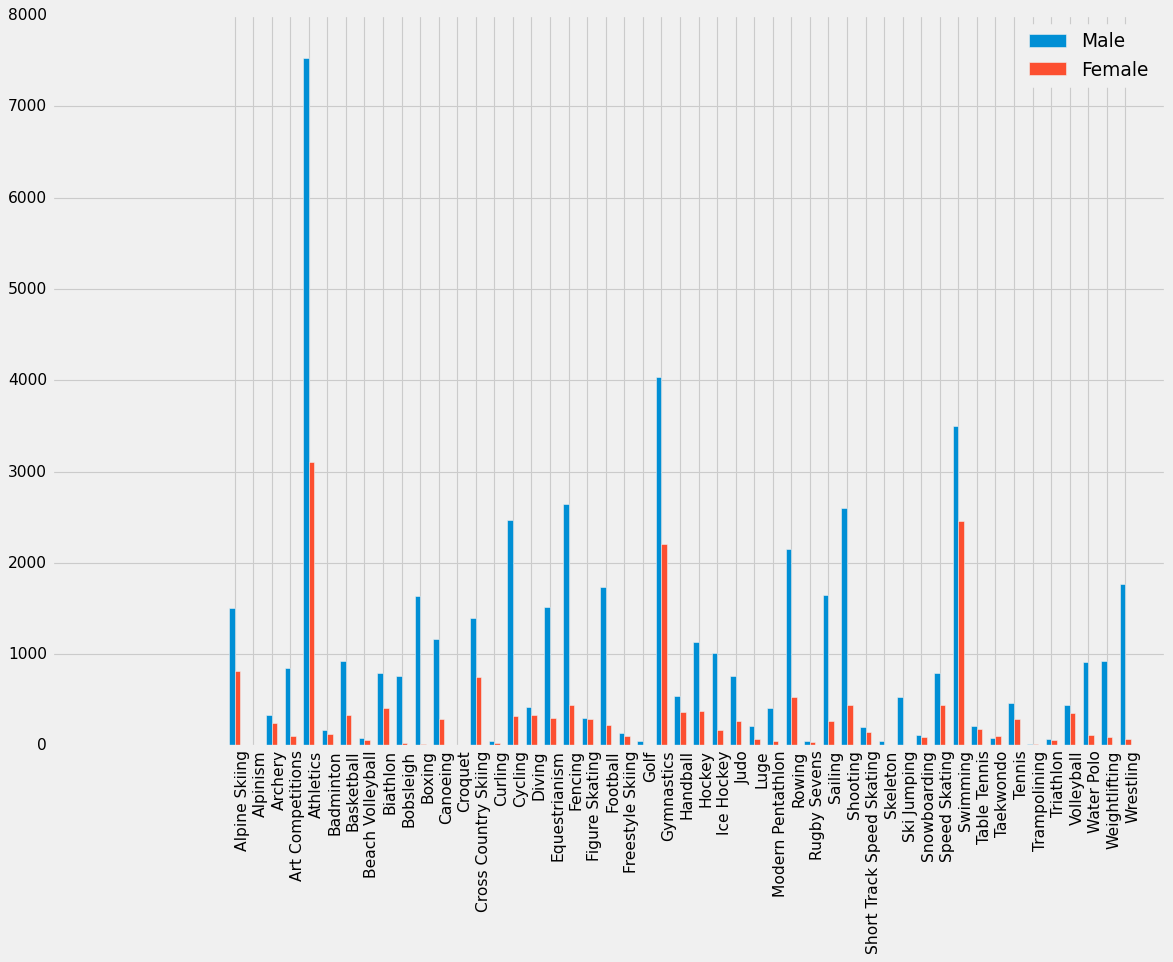

In [ ]:
plt.figure(figsize=(16, 11))
x = np.arange(0,98,2)
w = 0.6
plt.bar(x-w , mpartspr.values , width = w , label = "Male")
plt.bar(x , fpartspr.values , width = w , label = "Female")
plt.xticks(ticks = x-(w/2) , labels = mpartspr.index , rotation = 90 , ha = "left")
plt.legend()
plt.show()

In [ ]:
m_p = df_m['Year'].value_counts()
m_p = m_p.sort_index()

In [ ]:
m_p

1896      65
1900     618
1904     306
1906     429
1908     853
1912     991
1920    1174
1924    1496
1928    1330
1932     810
1936    1702
1948    1902
1952    2070
1956    1379
1960    2083
1964    1924
1968    2133
1972    2407
1976    2097
1980    1781
1984    2369
1988    2826
1992    2966
1994     507
1996    2321
1998     552
2000    2174
2002     610
2004    2120
2006     644
2008    2052
2010     546
2012    1888
2014     675
2016    2077
Name: Year, dtype: int64

In [ ]:
f_p = df_f['Year'].value_counts()
f_p = f_p.sort_index()

In [ ]:
inter = np.intersect1d(m_p.index , f_p.index)
for x in m_p.index:
  if x in inter:
    pass
  else:
    m_p.drop(x , inplace= True)

In [ ]:
f_p[1948] = 50

In [ ]:
for x in f_p.index:
  if x in inter:
    pass
  else:
    f_p.drop(x , inplace= True)

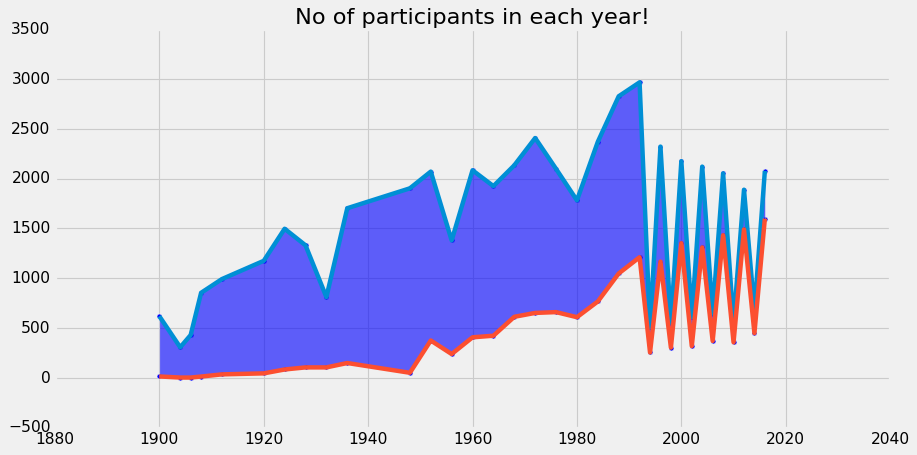

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("No of participants in each year!")
plt.plot(m_p.index , m_p.values , label = "Male")
plt.plot(f_p.index , f_p.values , label = "Female")
plt.scatter(m_p.index , m_p.values)
plt.scatter(f_p.index , f_p.values)
plt.fill_between(m_p.index , m_p.values ,f_p.values ,alpha = 0.61 , interpolate = True,
                 where = (m_p.values >  f_p.values))
plt.fill_between(m_p.index , m_p.values ,f_p.values ,alpha = 1 ,
                 where = (m_p.values < f_p.values) , color = "g" , interpolate = True)
plt.show()

In [ ]:
males = df.loc[df['Sex'] == "M" , "Age"].values

In [ ]:
males

array([22., 24., 22., ..., 23., 19., 38.])

In [ ]:
females = df.loc[df['Sex'] == "F" , "Age"].values

[]

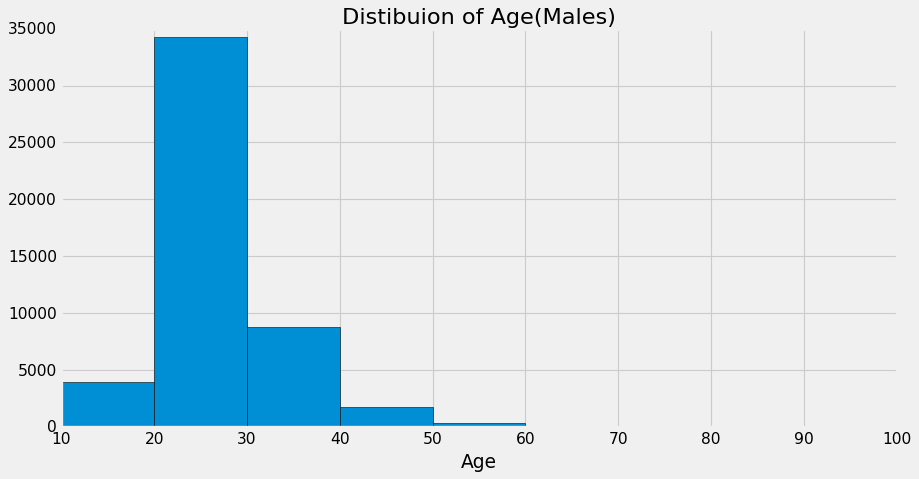

In [ ]:
plt.figure(figsize=(12, 6))

bins = [10, 20,30 , 40 , 50 ,60,70 , 80 , 90 , 100]
plt.title("Distibuion of Age(Males)")
plt.hist(males , edgecolor = 'black' , bins = bins)
plt.xlabel("Age")
plt.plot()

In [ ]:
data = pd.read_excel("Book 3.xlsx")

In [ ]:
data

""


In [ ]:
# plt.scatter(["India" , "china" , "us"] , [7,13,11] , c = [3,2,1 ] , s = [300 , 200 ,100] , cmap = 'Greens')
# bar = plt.colorbar()
# bar.set_label("Population")
# plt.ylabel("Employment")
# plt.show()

In [ ]:
df_medal =  df.dropna(subset = ["Medal" , "Weight"])

In [ ]:
df_ath = df_medal[df["Sport"] == "Athletics" ]

<ipython-input-424-e78e9ee60a5a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ath = df_medal[df["Sport"] == "Athletics" ]


In [ ]:
ath = df_ath['Sex']

In [ ]:
ath.shape

(960,)

In [ ]:
ath_w = df_ath['Weight']

In [ ]:
ath_w.shape

(960,)

In [ ]:
medals = []

In [ ]:
for x in df_ath['Medal']:
  if x == "Bronze":
    medals.append(3)
  elif x == "Silver":
    medals.append(2)
  elif x == "Gold":
    medals.append(1)
  else :
    medals.append(0)

In [ ]:
del medals

In [ ]:
len(medals)

960

[]

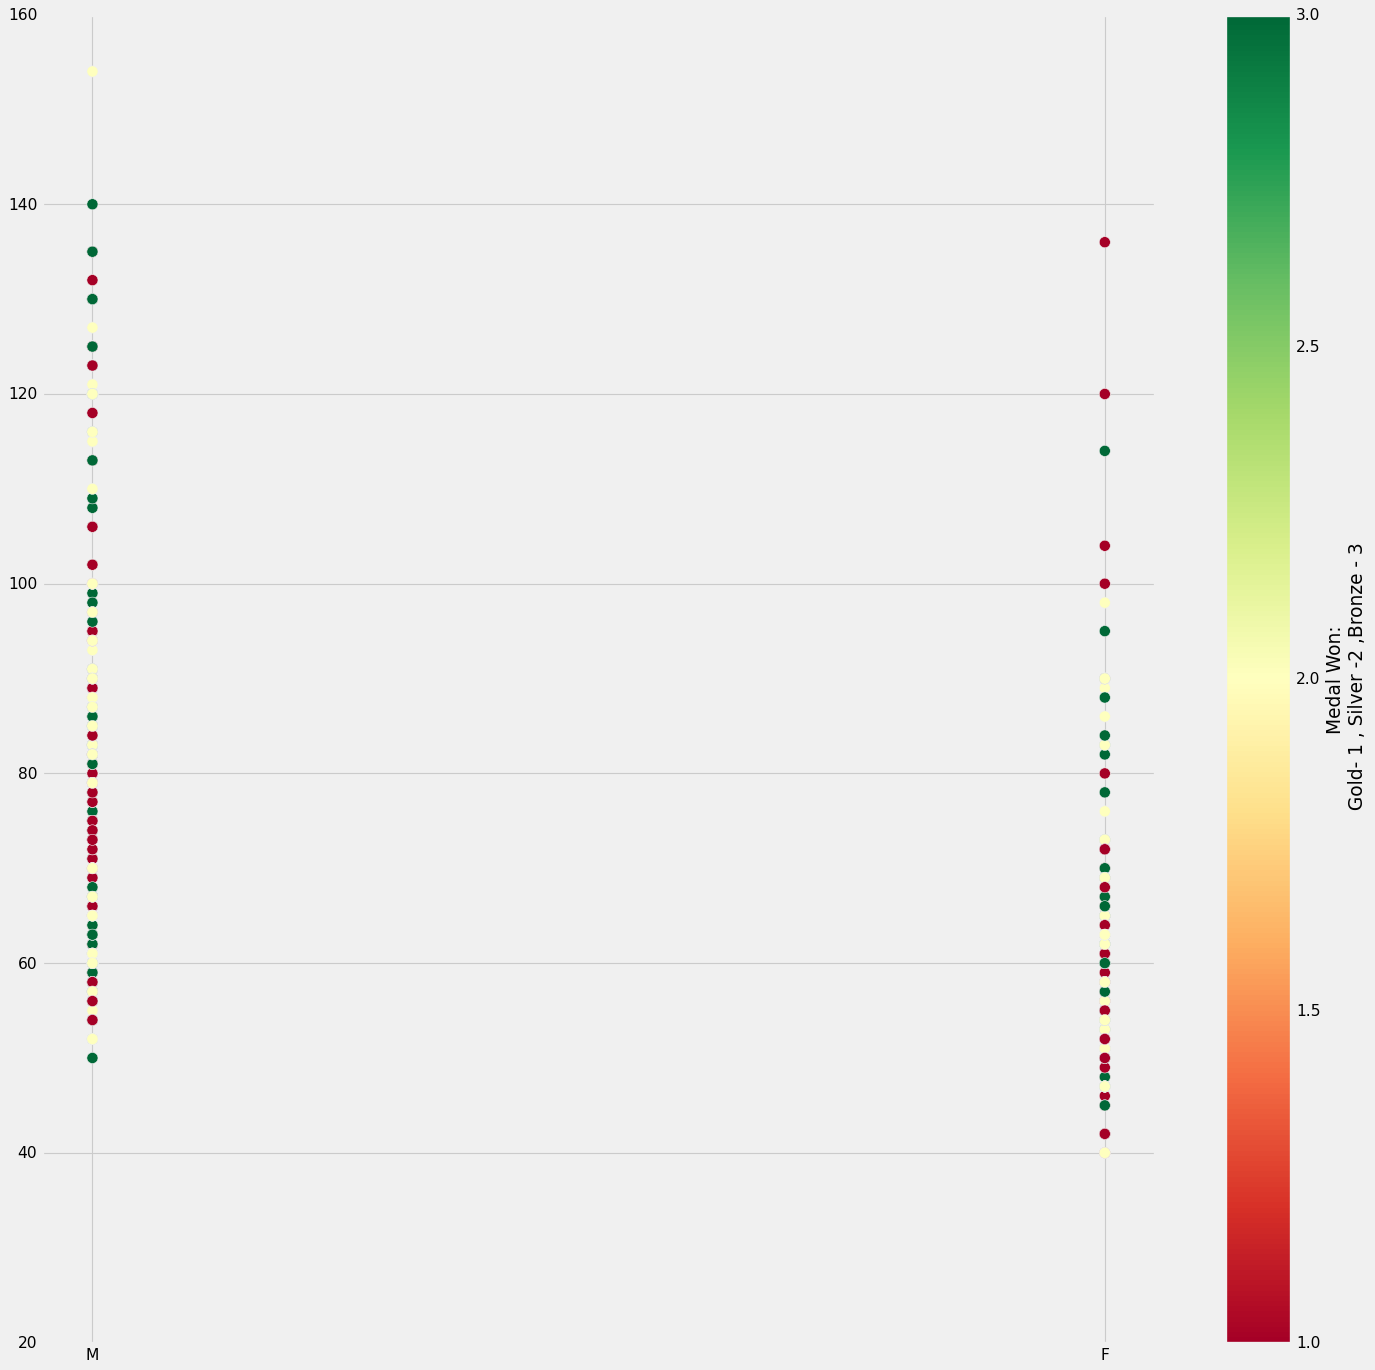

In [ ]:
plt.figure(figsize = (20,20))
plt.scatter(ath , ath_w , c = medals , cmap='RdYlGn'  , s = 100)
clrbar = plt.colorbar()
clrbar.set_label("Medal Won:\n Gold- 1 , Silver -2 ,Bronze - 3")
plt.plot()

In [ ]:
unique_w = df_ath["Weight"]

In [ ]:
68178/960

71.01875

[]

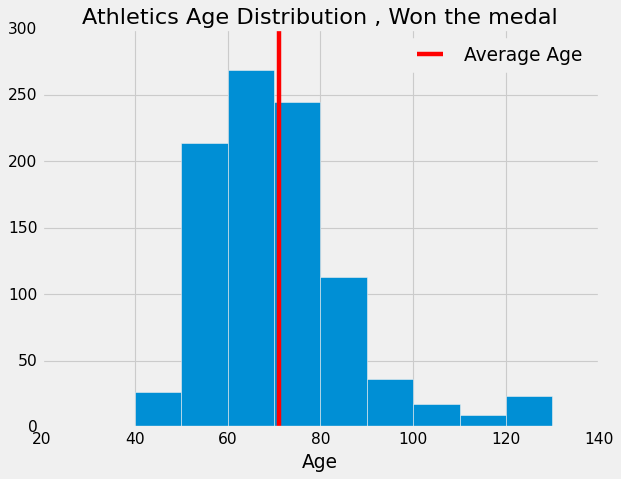

In [ ]:
plt.hist(ath_w.values , bins = [20 ,30 , 40 ,50 , 60 ,70 , 80 , 90 , 100 , 110 , 120 , 130])
plt.title("Athletics Age Distribution , Won the medal")
plt.xlabel("Age")
plt.axvline(71.01875 , c = "r" , label = "Average Age\n")
plt.legend()
plt.plot()

In [ ]:
df_ath[(df_ath['Weight'] == 58) & (df_ath['Medal'] == "Gold") ].shape

(26, 14)

In [ ]:
df_ath[(df_ath['Weight'] == 58) & (df_ath['Medal'] == "Silver") ].shape

(15, 14)

In [ ]:
df_ath[(df_ath['Weight'] == 58) & (df_ath['Medal'] == "Bronze") ].shape

(15, 14)